In [12]:
from tensorflow.keras.datasets import mnist

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
(trainx, trainy), (testx, testy) = mnist.load_data()

In [15]:
trainx.shape, trainy.shape, testx.shape, testy.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5, 0, '4')

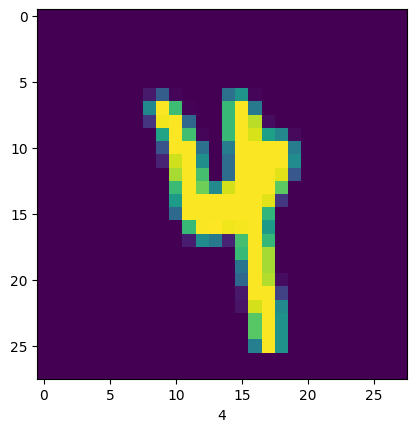

In [16]:
def choose_random_train():
    random_number = np.random.randint(0, 60000)
    return random_number

random_number = choose_random_train()
random_x = trainx[random_number]
random_y = trainy[random_number]

plt.imshow(random_x)
plt.xlabel(random_y)

    

In [17]:
# making a forward propagation model

# Plan
# Start with 28x28 input layer, which takes the flattened input
# Implement all the layers as a class

class Flattener:
    def __init__(self, shape):
        self.from_shape = shape
    def apply(self, data):
        return np.ndarray.flatten(data)
    def back_prop(self, data):
        return np.ndarray.reshape(data, self.from_shape)

# Then a simple linear model with weights only
class Weights:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size

        # We need to store transposed weights because the input is a row vector
        self.weights = np.random.rand(input_size, output_size)*2 - 1
    
    def apply(self, data):
        return np.matmul(data, self.weights)
    
class Biases:
    def __init__(self, input_size):
        self.input_size = input_size
        self.biases = np.random.rand(input_size) * 2 - 1
    
    def apply(self, data):
        return data + self.biases
    
class ReluActivation:
    def __init__(self, input_size = None):
        self.input_size = input_size
        self.function = lambda x: 0 if x <= 0 else x
        self.vectorized_function = np.vectorize(self.function)

    def apply(self, data):
        return self.vectorized_function(data)

class SoftMaxActivation:
    def __init__(self, input_size = None):
        self.input_size = input_size
    
    def apply(self, data):
        maximum_value = np.max(data)
        new_data = np.exp(data - maximum_value)
        denominator = np.sum(new_data)
        new_data /= denominator
        return new_data

class Model:
    def __init__(self, layers):
        self.layers = layers
        self.save_outputs = [None] * len(layers)
    
    def forward_prop(self, input):
        intermediate_output = input
        for i, layer in enumerate(self.layers):
            intermediate_output = layer.apply(intermediate_output)
            self.save_outputs[i] = intermediate_output
        
        return intermediate_output
        

        
        
    
    # def apply(self, data):
        
# flattener = np.ndarray.flatten


In [18]:
# Building a model
model = Model([
    Flattener(shape=(28, 28)),

    Weights(28*28, 512),
    Biases(512),
    ReluActivation(),

    Weights(512, 200),
    Biases(200),
    ReluActivation(),

    Weights(200, 50),
    Biases(50),
    ReluActivation(),


    Weights(50, 10),
    Biases(10),
    SoftMaxActivation()
])

model.forward_prop(random_x)

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

(512,)
(512,)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Text(0, 0.5, 'Output after softmax')

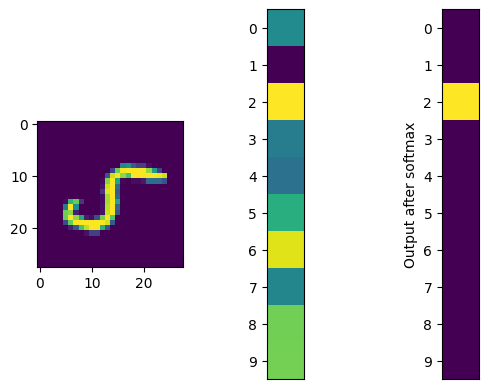

In [19]:
# Getting input

random = choose_random_train()
random_x = trainx[random]
random_y = trainy[random]


# Test
flattener = Flattener(shape=(28,28))

weights_layer = Weights(28*28, 512)
bias_layer = Biases(512)
activation_layer = ReluActivation()

another_weights_layer = Weights(512, 10)
another_bias_layer = Biases(10)
another_activation_layer = SoftMaxActivation()

plt.subplot(1,3,1)
plt.imshow(random_x)

input = random_x
flattened_output = flattener.apply(input)
weighted_output = weights_layer.apply(flattened_output)
biased_output = bias_layer.apply(weighted_output)
activated_output = activation_layer.apply(biased_output)

another_weighted_output = another_weights_layer.apply(activated_output)
another_biased_output = another_bias_layer.apply(another_weighted_output)
another_activated_output = another_activation_layer.apply(another_biased_output)

numpy_image = np.reshape(another_activated_output, (-1,1))

print(weighted_output.shape)
print(biased_output.shape)
print(another_activated_output)

plt.subplot(1,3,2)
plt.imshow(np.reshape(another_biased_output, (-1,1)))
plt.yticks(np.arange(10))
plt.xticks([])
plt.ylabel("")

plt.subplot(1,3,3)
plt.imshow(numpy_image)
plt.yticks(np.arange(10))
plt.xticks([])
plt.ylabel("Output after softmax")